In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("bigdatamart_Train.csv")
test = pd.read_csv("bigdatamart_Test.csv")

In [3]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#Check missing values:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Filling missing values


In [8]:
df.Item_Outlet_Sales = df.Item_Outlet_Sales.fillna(df.Item_Outlet_Sales.mean())

In [9]:
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [10]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [11]:
df.Outlet_Size = df.Outlet_Size.fillna('Medium')

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

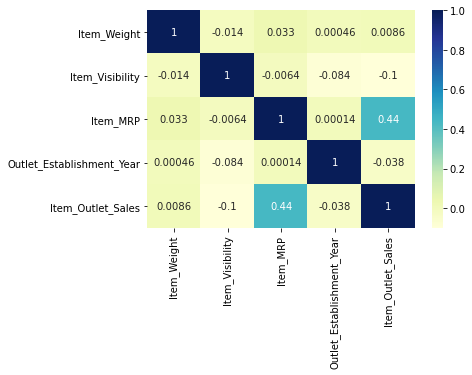

In [13]:
import seaborn as sns
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [14]:
#Item type combine:
df['Item_Identifier'].value_counts()
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

# One hot encoding of categorical  values

In [15]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [16]:
#One Hot Coding:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined',
                              'Outlet'])

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

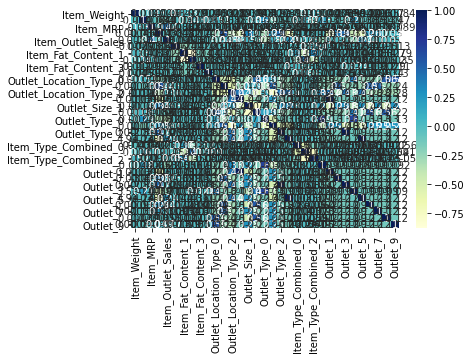

In [19]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [20]:
df.skew()

Item_Weight                  0.111314
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.520025
Item_Fat_Content_0           4.924835
Item_Fat_Content_1          -0.397111
Item_Fat_Content_2           0.677368
Item_Fat_Content_3           8.765082
Item_Fat_Content_4           8.358810
Outlet_Location_Type_0       0.978942
Outlet_Location_Type_1       0.738898
Outlet_Location_Type_2       0.437946
Outlet_Size_0                2.504047
Outlet_Size_1               -0.453089
Outlet_Size_2                0.978942
Outlet_Type_0                2.239618
Outlet_Type_1               -0.649044
Outlet_Type_2                2.512180
Outlet_Type_3                2.497113
Item_Type_Combined_0         2.808733
Item_Type_Combined_1        -0.970026
Item_Type_Combined_2         1.588047
Outlet_0                     3.525331
Outlet_1                     2.504047
Outlet_2                     2.515681
Outlet_3    

Item_Weight                     AxesSubplot(0.125,0.125;0.0196701x0.755)
Item_Visibility              AxesSubplot(0.148604,0.125;0.0196701x0.755)
Item_MRP                     AxesSubplot(0.172208,0.125;0.0196701x0.755)
Outlet_Establishment_Year    AxesSubplot(0.195812,0.125;0.0196701x0.755)
Item_Outlet_Sales            AxesSubplot(0.219416,0.125;0.0196701x0.755)
Item_Fat_Content_0            AxesSubplot(0.24302,0.125;0.0196701x0.755)
Item_Fat_Content_1           AxesSubplot(0.266624,0.125;0.0196701x0.755)
Item_Fat_Content_2           AxesSubplot(0.290228,0.125;0.0196701x0.755)
Item_Fat_Content_3           AxesSubplot(0.313832,0.125;0.0196701x0.755)
Item_Fat_Content_4           AxesSubplot(0.337437,0.125;0.0196701x0.755)
Outlet_Location_Type_0       AxesSubplot(0.361041,0.125;0.0196701x0.755)
Outlet_Location_Type_1       AxesSubplot(0.384645,0.125;0.0196701x0.755)
Outlet_Location_Type_2       AxesSubplot(0.408249,0.125;0.0196701x0.755)
Outlet_Size_0                AxesSubplot(0.431853,0

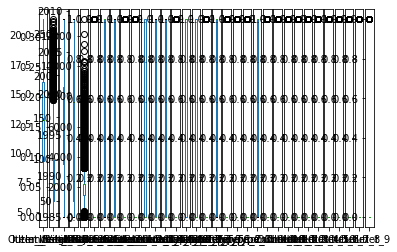

In [21]:
df.plot(kind='box',subplots=True)

In [43]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'source', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Item_Fat_Content_3',
       'Item_Fat_Content_4', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1',
       'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7',
       'Outlet_8', 'Outlet_9'],
      dtype='object')

In [67]:
#Drop the columns which have been converted to different types:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.138000,train,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.422800,train,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.270000,train,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.380000,train,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.705200,train,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,2181.288914,test,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,169.1448,OUT018,2181.288914,test,0,0,1,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,118.7440,OUT045,2181.288914,test,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.000000,214.6218,OUT017,2181.288914,test,0,0,1,...,0,0,1,0,0,0,0,0,0,0


# Exporting Data

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
#Divide into test and train:
df1 = df.loc[df['source']=="train"]

In [90]:
df2 = df.loc[df['source']=="test"]

In [91]:
df1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,0,...,0,1,0,0,0,0,0,0,0,0


In [92]:
df2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,20.750000,0.007565,Snack Foods,107.8622,OUT049,1999,2181.288914,test,0,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,8.300000,0.038428,Dairy,87.3198,OUT017,2007,2181.288914,test,0,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,14.600000,0.099575,Others,241.7538,OUT010,1998,2181.288914,test,0,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,7.315000,0.015388,Snack Foods,155.0340,OUT017,2007,2181.288914,test,0,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,12.792854,0.118599,Dairy,234.2300,OUT027,1985,2181.288914,test,0,...,0,0,0,0,0,1,0,0,0,0


In [111]:
df1.drop(['Item_Type','Outlet_Establishment_Year','source'],axis=1,inplace=True)
df1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [112]:
df2.drop(['Item_Type','Outlet_Establishment_Year','source'],axis=1,inplace=True)

In [113]:
X_train = df1.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)

In [114]:
y_train = df1[['Item_Outlet_Sales']]

In [125]:
X_test = df2.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'], axis=1)

In [126]:
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,20.750000,0.007565,107.8622,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8524,8.300000,0.038428,87.3198,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
8525,14.600000,0.099575,241.7538,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8526,7.315000,0.015388,155.0340,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8527,12.792854,0.118599,234.2300,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [127]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [128]:
y_train.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [129]:
X_train.shape

(8523, 31)

In [130]:
X_test.shape

(5681, 31)

In [131]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [132]:
lr = LinearRegression()

In [133]:
lr.fit(X_train, y_train)

LinearRegression()

In [134]:
# Predicting the test set results
y_pred = lr.predict(X_test)

In [135]:
y_pred

array([[1848.53604783],
       [1472.81670435],
       [1875.65285894],
       ...,
       [1809.18796433],
       [3565.6645235 ],
       [1267.46171871]])

In [137]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [138]:
lr_accuracy = round(lr.score(X_train,y_train) * 100,2)
lr_accuracy

56.36

In [139]:
r2_score(y_train, lr.predict(X_train))

0.563589277727048

In [142]:
cv_score = cross_val_score(lr, X_train, y_train, cv=5)

In [143]:
print(np.sqrt(np.abs(cv_score)))

[0.75571633 0.74509312 0.73995267 0.75255581 0.75171429]


# Decision Tree Model

In [144]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [145]:
# Predicting the test set results
y_preddt = dt.predict(X_test)
y_preddt

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3805.94860417, 1349.51290433])

In [146]:
tree_accuracy = round(dt.score(X_train,y_train),2)
tree_accuracy

0.59

In [147]:
r2_score(y_train, dt.predict(X_train))

0.5884050821570486

In [149]:
cv_score = cross_val_score(dt, X_train, y_train, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.76166126 0.74999795 0.72145219 0.75916104 0.75750393]


# Random Forest

In [150]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [151]:
y_predrf = rf.predict(X_test)
y_predrf

array([1659.51960279, 1365.0795643 ,  602.28963098, ..., 1955.57225522,
       3648.80987653, 1280.11192989])

In [152]:
rf_accuracy = round(rf.score(X_train,y_train),2)
rf_accuracy

0.61

In [153]:
r2_score(y_train, rf.predict(X_train))

0.6126122872991928

In [155]:
cv_score = cross_val_score(rf, X_train, y_train, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.77995963 0.7660524  0.75832157 0.78017984 0.77911658]


In [158]:
import pickle
filename = 'bigdatamart.pkl'
pickle.dump(rf,open(filename,'wb'))